In [123]:
# Bollinger Band Strategy


In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf


In [126]:
# Downloading 3M India company from Yahoo Finance
df= yf.download("^NSEBANK", period ="2y", interval="1d")

[*********************100%***********************]  1 of 1 completed


In [127]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-06-03,31406.050781,31674.599609,31284.699219,31653.650391,31653.650391,0
2019-06-04,31532.900391,31752.699219,31512.949219,31589.050781,31589.050781,0
2019-06-06,31523.949219,31541.500000,30800.800781,30857.400391,30857.400391,274600
2019-06-07,30943.150391,31139.599609,30627.050781,31066.550781,31066.550781,0
2019-06-10,31259.199219,31367.400391,30861.300781,31034.000000,31034.000000,0
...,...,...,...,...,...,...
2021-05-27,34664.199219,35220.800781,34529.699219,35095.050781,35095.050781,0
2021-05-28,35345.648438,35436.648438,34977.199219,35141.449219,35141.449219,0
2021-05-31,35097.449219,35584.300781,34930.101562,35526.648438,35526.648438,0


In [128]:
# Calculating the simle moving Average, Standard deviation, upper band and lower band
# get the time period (20 day)

period =20
# Calculate the SMA
df["SMA"] = df["Close"].rolling(window = period).mean()
# Calculate the Standard deviation
df["STD"] = df["Close"].rolling(window = period).std()
# Calculate the upper Bollinger band
df["Upper"] = df["SMA"] + (df["STD"] * 2)
df["Lower"] = df["SMA"] - (df["STD"] * 2)

In [129]:
df

,Open,High,Low,Close,Adj Close,Volume,SMA,STD,Upper,Lower
Date,,,,,,,,,,
2019-06-03,31406.050781,31674.599609,31284.699219,31653.650391,31653.650391,0,NaN,NaN,NaN,NaN
2019-06-04,31532.900391,31752.699219,31512.949219,31589.050781,31589.050781,0,NaN,NaN,NaN,NaN
2019-06-06,31523.949219,31541.500000,30800.800781,30857.400391,30857.400391,274600,NaN,NaN,NaN,NaN
2019-06-07,30943.150391,31139.599609,30627.050781,31066.550781,31066.550781,0,NaN,NaN,NaN,NaN
2019-06-10,31259.199219,31367.400391,30861.300781,31034.000000,31034.000000,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-05-27,34664.199219,35220.800781,34529.699219,35095.050781,35095.050781,0,33438.899902,935.440538,35309.780978,31568.018826
2021-05-28,35345.648438,35436.648438,34977.199219,35141.449219,35141.449219,0,33510.247363,1009.086105,35528.419572,31492.075154
2021-05-31,35097.449219,35584.300781,34930.101562,35526.648438,35526.648438,0,33647.489746,1088.344228,35824.178201,31470.801291


<AxesSubplot:xlabel='Date'>

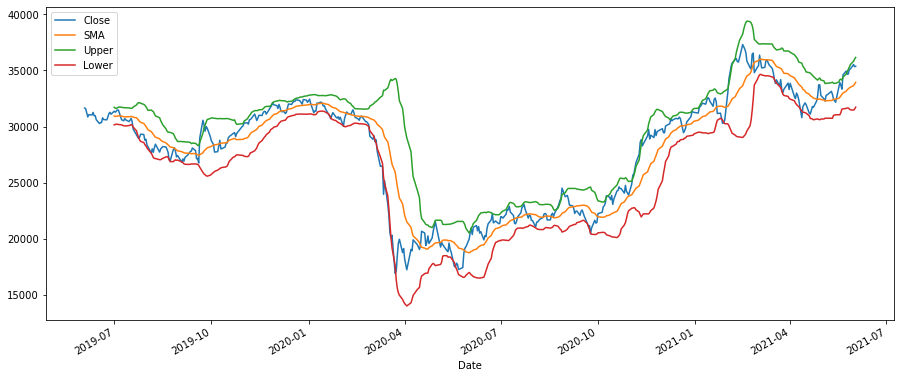

In [130]:
# Cretae  list of columns to keep the required columns
column_list = ["Close","SMA","Upper","Lower"]
#plot the data
df[column_list].plot(figsize =(15.2,6.4))

In [131]:
# Creating a buy and sell call
new_df =df[period -1:]
new_df

,Open,High,Low,Close,Adj Close,Volume,SMA,STD,Upper,Lower
Date,,,,,,,,,,
2019-07-01,31271.000000,31449.650391,31247.449219,31372.199219,31372.199219,0,30938.819922,391.952283,31722.724487,30154.915357
2019-07-02,31414.650391,31431.349609,31105.099609,31283.300781,31283.300781,0,30920.302441,364.166804,31648.636050,30191.968833
2019-07-03,31347.699219,31466.349609,31242.099609,31382.300781,31382.300781,0,30909.964941,346.699674,31603.364289,30216.565594
2019-07-04,31471.000000,31608.349609,31428.050781,31471.849609,31471.849609,242986000,30940.687402,368.345273,31677.377949,30203.996856
2019-07-05,31523.050781,31660.750000,31323.250000,31475.800781,31475.800781,0,30961.149902,386.619426,31734.388754,30187.911051
...,...,...,...,...,...,...,...,...,...,...
2021-05-27,34664.199219,35220.800781,34529.699219,35095.050781,35095.050781,0,33438.899902,935.440538,35309.780978,31568.018826
2021-05-28,35345.648438,35436.648438,34977.199219,35141.449219,35141.449219,0,33510.247363,1009.086105,35528.419572,31492.075154
2021-05-31,35097.449219,35584.300781,34930.101562,35526.648438,35526.648438,0,33647.489746,1088.344228,35824.178201,31470.801291


In [132]:
def get_signal():
    buy_signal =[]
    sell_signal =[]
    
    for i in range(len(data["Close"])):
        if data["Close"][i] > data["Upper"][i]:
            buy_signal.apppen(np.nan)
            sell_signal.append(data["Close"])
        elif data["Close"][i] < data["Close"][i]:
            sell_signal.append(np.nan)
            buy_signal.append(data[Close][i])
        else:
            buy_signal.append(np.nan)
            sell_signal.append(np.nan)
    return(buy_signal, sell_signal)

In [133]:
# Creat a two new columns
new_df['Buy'] = get_signal(new_df)[0]
new_df['Sell'] = get_signal(new_df)[1]

TypeError: get_signal() takes 0 positional arguments but 1 was given